## importing necessary packages

In [96]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import plotly.express as px 
import seaborn as sns

## concating train and test data 

In [97]:

train_dataSet = pd.read_csv('./data/train.csv')
test_dataSet = pd.read_csv('./data/test.csv') 
whole_dataSet = pd.concat([train_dataSet, test_dataSet])
whole_dataSet

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11394,0x6909,JAPRES01DEL01,35,4.6,26.905190,75.810753,27.015190,75.920753,27-03-2022,21:35:00,21:45:00,conditions Sunny,Jam,1,Snack,scooter,1,No,Metropolitian,NaN
11395,0x443b,JAPRES11DEL01,33,4.9,26.902940,75.793007,26.912940,75.803007,11-03-2022,11:40:00,11:45:00,conditions Sandstorms,High,1,Drinks,scooter,1,No,Metropolitian,NaN
11396,0x1ea5,SURRES11DEL03,NaN,NaN,21.157735,72.768778,21.217735,72.828778,11-03-2022,NaN,21:05:00,conditions NaN,NaN,3,Drinks,scooter,1,No,Metropolitian,NaN
11397,0x22d4,VADRES03DEL02,27,4.7,22.320000,73.170000,22.450000,73.300000,06-03-2022,18:35:00,18:40:00,conditions Sandstorms,Medium,0,Meal,motorcycle,0,No,Metropolitian,NaN


## dropping na's and unnecessary features and modifing some columns

In [98]:
whole_dataSet.replace('NaN ' , np.nan , inplace=True) # some values are NaN string with extra space 
# i replaced them with real nan value and then droped them 

In [99]:
whole_dataSet.dropna(inplace=True)
whole_dataSet.drop(columns=['ID','Delivery_person_ID'] , axis=1 , inplace=True)

### converting time_taken to integer values

In [100]:
whole_dataSet['Time_taken(min)'] =whole_dataSet['Time_taken(min)'].apply(lambda x : int(x.replace('(min)', ''))) 

### modifying data set columns 

In [101]:
whole_dataSet['Time_Orderd'] = whole_dataSet['Time_Orderd'].apply(lambda x: pd.to_datetime(x).time())
whole_dataSet['Time_Order_picked'] = whole_dataSet['Time_Order_picked'].apply(lambda x:pd.to_datetime(x).time())
whole_dataSet['Order_Date'] = pd.to_datetime(whole_dataSet['Order_Date'])

C:\Users\Alchemist\AppData\Local\Temp\ipykernel_4048\2533970972.py:3: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  whole_dataSet['Order_Date'] = pd.to_datetime(whole_dataSet['Order_Date'])


### in this case after i converted strings to pandas time , i create time periods to see how orders and other featuers has collaboration with time periods 

In [102]:
bins = [
    pd.to_datetime('00:00').time(), 
    pd.to_datetime('04:00').time(),
    pd.to_datetime('07:00').time(), 
    pd.to_datetime('10:00').time(), 
    pd.to_datetime('13:00').time(), 
    pd.to_datetime('16:00').time(), 
    pd.to_datetime('19:00').time(),
    pd.to_datetime('22:00').time(),
    pd.to_datetime('23:59').time()
]
labels = ['00:00-04:00', '04:00-07:00', '07:00-10:00', '10:00-13:00', 
          '13:00-16:00', '16:00-19:00', '19:00-22:00', '22:00-00:00']
def assign_time_period(time): 
    for i in range(len(bins) - 1): 
        if bins[i] <= time < bins[i+1]: 
            return labels[i]
whole_dataSet['time_periods']= whole_dataSet['Time_Orderd'].apply(assign_time_period)

### removing extra spaces from som columns

In [103]:
whole_dataSet['Road_traffic_density'] =whole_dataSet['Road_traffic_density'].apply(lambda x:x.strip())

## saving clean data

In [104]:
whole_dataSet.to_csv('./data/clean_data.csv')

In [105]:
whole_dataSet

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),time_periods
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,10:00-13:00
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,19:00-22:00
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,07:00-10:00
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,16:00-19:00
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,13:00-16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,10:00-13:00
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,19:00-22:00
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,22:00-00:00
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,13:00-16:00


In [106]:
weather_filter = whole_dataSet[['Weatherconditions' , 'Time_taken(min)']]

In [107]:
weather_group = weather_filter.groupby('Weatherconditions')
mean_time_by_condition = weather_filter.groupby('Weatherconditions')['Time_taken(min)'].mean().round(2)

In [108]:
mean_weather_df = pd.DataFrame(mean_time_by_condition).reset_index()
mean_weather_df['total_orders']=  whole_dataSet['Weatherconditions'].value_counts().values
#Removed repetitive wording for enhanced readability and professionalism
mean_weather_df['Weatherconditions']  = mean_weather_df['Weatherconditions'].apply(lambda x : x.replace('conditions' , '').strip())
mean_weather_df.to_csv('./data/visualizations_df/weather_timeTaken.csv' , index=False)


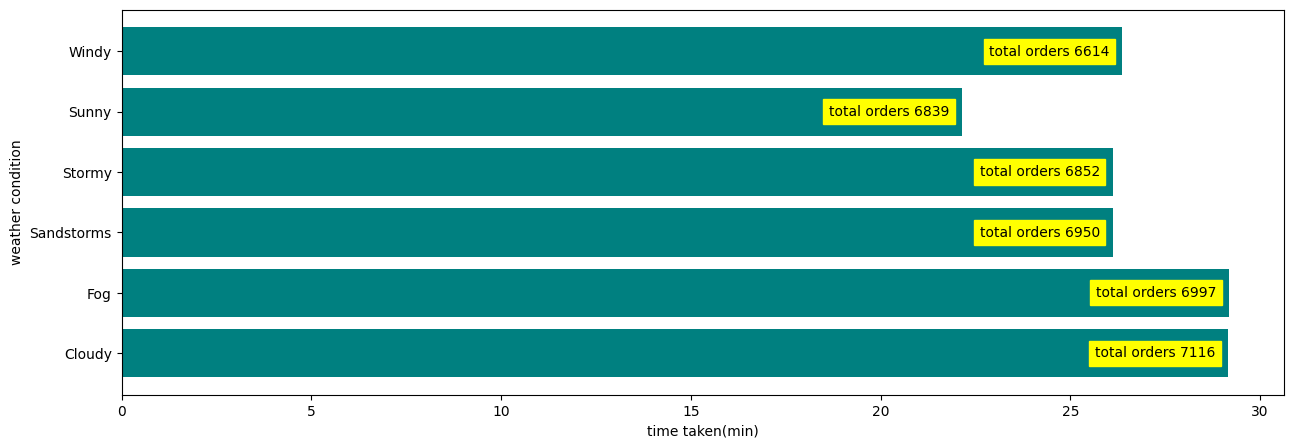

In [109]:
fig , ax = plt.subplots(figsize=(15,5))
bars = ax.barh(mean_weather_df['Weatherconditions'], mean_weather_df['Time_taken(min)'] , color='teal')
ax.set_xlabel('time taken(min)')
ax.set_ylabel('weather condition')
for bar, count in zip(bars, mean_weather_df['total_orders']):
    ax.text(bar.get_width()-3.5, bar.get_y() + bar.get_height()/2, 
            f'total orders {count}', 
            va='center', ha='left', color='black', fontsize=10 , bbox=dict(facecolor='yellow', edgecolor='yellow'))

## preparing data for traffic analysis

In [110]:
traffic = whole_dataSet[['Road_traffic_density' ,'Time_taken(min)' , 'Type_of_vehicle' ,'Time_Orderd' , 'time_periods']]
traffic.to_csv('./data/visualizations_df/traffic.csv', index=False)

Text(0, 0.5, 'time_taken')

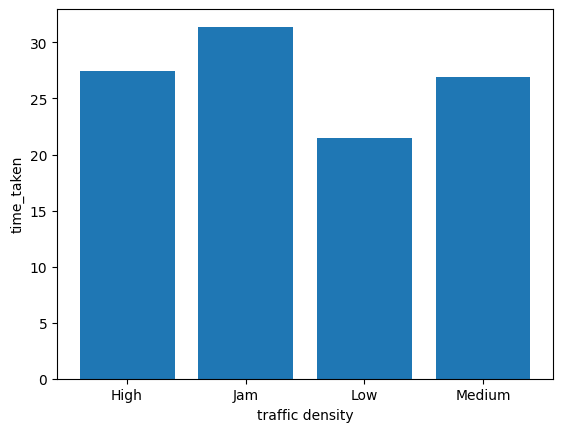

In [111]:
mean_traffic_df = traffic.groupby('Road_traffic_density')['Time_taken(min)'].mean().round(2)
mean_traffic_df = pd.DataFrame(mean_traffic_df).reset_index()
mean_traffic_df.to_csv('./data/visualizations_df/mean_traffic_df.csv' , index=False)
fig ,axes = plt.subplots()
axes.bar(mean_traffic_df['Road_traffic_density'] , mean_traffic_df['Time_taken(min)'])
axes.set_xlabel('traffic density')
axes.set_ylabel("time_taken")

<Axes: xlabel='Type_of_vehicle', ylabel='Road_traffic_density'>

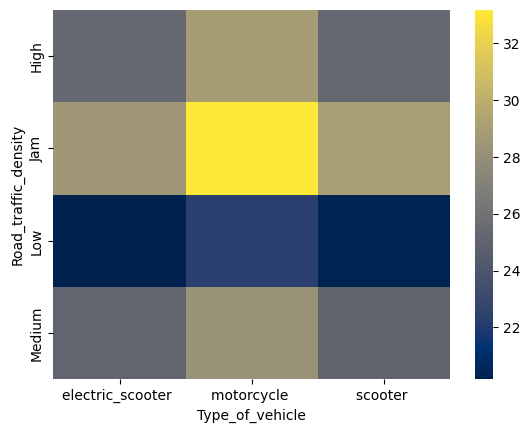

In [112]:
heatmap_data = traffic.pivot_table(values='Time_taken(min)' , index='Road_traffic_density', columns='Type_of_vehicle')
sns.heatmap(heatmap_data, cmap='cividis') 

### time effect on traffic 

In [113]:
traffic_group_df = pd.DataFrame(traffic.groupby('time_periods')['Road_traffic_density'].agg(lambda x :x.mode()[0])).reset_index()## the zero here is to make sure 
# if we have same amount of frequency in one value instead of list just return the first one 
traffic_group_df.to_csv("./data/visualizations_df/time_traffic.csv")
traffic_group_df

,time_periods,Road_traffic_density
0,00:00-04:00,Low
1,07:00-10:00,Low
2,10:00-13:00,High
3,13:00-16:00,High
4,16:00-19:00,Medium
5,19:00-22:00,Jam
6,22:00-00:00,Low


### traffic scatter visualization

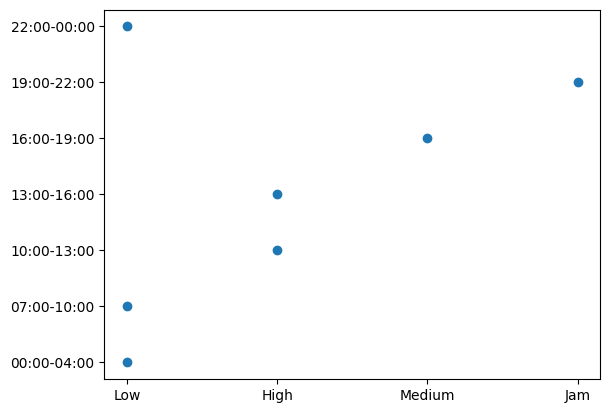

In [114]:
order = ['Low' , "Medium", "High" , "Jam"] 
traffic_group_df['Road_traffic_density'] = pd.Categorical(traffic_group_df['Road_traffic_density'], categories=order ,ordered=True )
fig , axes = plt.subplots() 
axes.scatter(traffic_group_df['Road_traffic_density'], traffic_group_df['time_periods'])

### traffic heatmap visualization

,time_periods,Road_traffic_density
0,00:00-04:00,Low
1,07:00-10:00,Low
2,10:00-13:00,High
3,13:00-16:00,High
4,16:00-19:00,Medium
5,19:00-22:00,Jam
6,22:00-00:00,Low


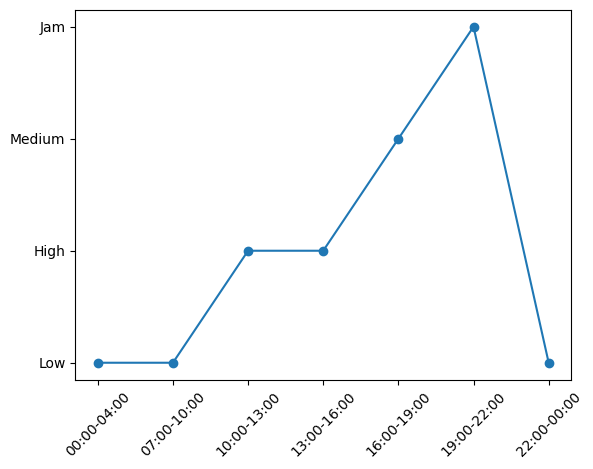

In [115]:
fig , axes = plt.subplots() 
axes.plot(traffic_group_df['time_periods'] , traffic_group_df['Road_traffic_density'] , marker="o")
plt.xticks(rotation=45);
traffic_group_df

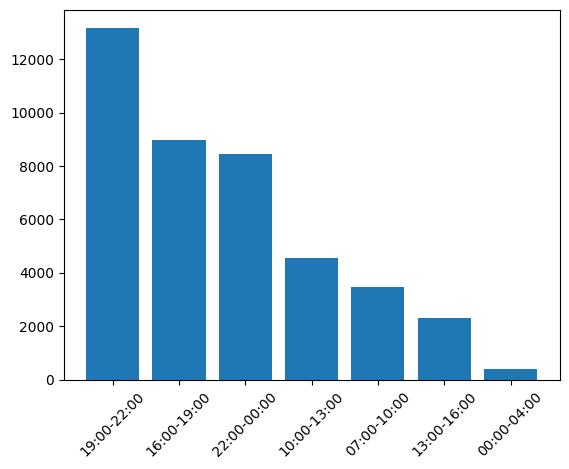

In [116]:
fig , axes  = plt.subplots() 
axes.bar(traffic['time_periods'].value_counts().index  , traffic['time_periods'].value_counts().values)
plt.xticks(rotation=45);

### age effect 

In [117]:
whole_dataSet

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min),time_periods
0,37,4.9,22.745049,75.892471,22.765049,75.912471,2022-03-19,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,24,10:00-13:00
1,34,4.5,12.913041,77.683237,13.043041,77.813237,2022-03-25,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,33,19:00-22:00
2,23,4.4,12.914264,77.678400,12.924264,77.688400,2022-03-19,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,26,07:00-10:00
3,38,4.7,11.003669,76.976494,11.053669,77.026494,2022-04-05,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,21,16:00-19:00
4,32,4.6,12.972793,80.249982,13.012793,80.289982,2022-03-26,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,30,13:00-16:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,30,4.8,26.902328,75.794257,26.912328,75.804257,2022-03-24,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,32,10:00-13:00
45589,21,4.6,0.000000,0.000000,0.070000,0.070000,2022-02-16,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,36,19:00-22:00
45590,30,4.9,13.022394,80.242439,13.052394,80.272439,2022-03-11,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,16,22:00-00:00
45591,20,4.7,11.001753,76.986241,11.041753,77.026241,2022-03-07,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,26,13:00-16:00


In [118]:
columns_to_convert = ['Delivery_person_Ratings', 'Delivery_person_Age'] 
whole_dataSet[columns_to_convert] = whole_dataSet[columns_to_convert].apply(pd.to_numeric)
age_df = whole_dataSet[['Delivery_person_Ratings' , 'Delivery_person_Age' , 'time_periods' , 'Time_taken(min)']]
age_df.to_csv('.//data/visualizations_df/age_df.csv' , index=False)
age_df

,Delivery_person_Ratings,Delivery_person_Age,time_periods,Time_taken(min)
0,4.9,37,10:00-13:00,24
1,4.5,34,19:00-22:00,33
2,4.4,23,07:00-10:00,26
3,4.7,38,16:00-19:00,21
4,4.6,32,13:00-16:00,30
...,...,...,...,...
45588,4.8,30,10:00-13:00,32
45589,4.6,21,19:00-22:00,36
45590,4.9,30,22:00-00:00,16
45591,4.7,20,13:00-16:00,26


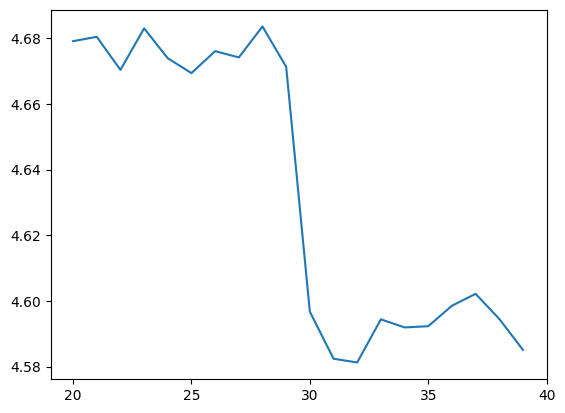

In [119]:
age_vs_rating_df = pd.DataFrame(age_df.groupby('Delivery_person_Age')['Delivery_person_Ratings'].mean()).reset_index()
fig ,axes = plt.subplots()
axes.plot(age_vs_rating_df['Delivery_person_Age'] , age_vs_rating_df['Delivery_person_Ratings'])
axes.set_xticks(range(20, 41, 5))

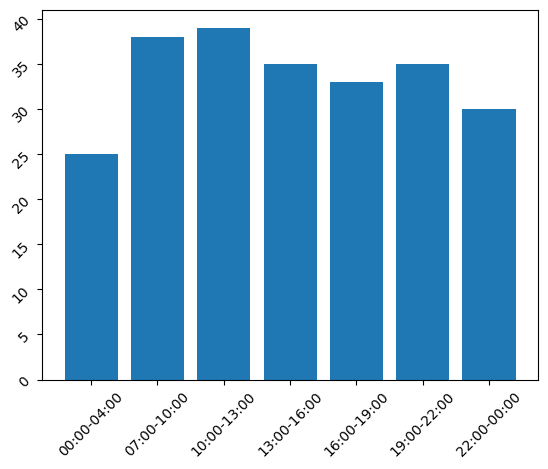

In [120]:
fr_age_df = pd.DataFrame(age_df.groupby('time_periods')['Delivery_person_Age'].agg(lambda x:x.mode()[0])).reset_index()
### checking most frequent deliver parson age and a period of time 
time_order = ['07:00-10:00', '10:00-13:00', '13:00-16:00', '16:00-19:00', '19:00-22:00', '22:00-00:00', '00:00-04:00']

fr_age_df['time_periods'] = pd.Categorical(fr_age_df['time_periods'], categories=time_order , ordered=True)
fig , axes = plt.subplots() 
axes.bar(fr_age_df['time_periods'] , fr_age_df['Delivery_person_Age'])
axes.tick_params(rotation=45)


In [121]:
age_df

,Delivery_person_Ratings,Delivery_person_Age,time_periods,Time_taken(min)
0,4.9,37,10:00-13:00,24
1,4.5,34,19:00-22:00,33
2,4.4,23,07:00-10:00,26
3,4.7,38,16:00-19:00,21
4,4.6,32,13:00-16:00,30
...,...,...,...,...
45588,4.8,30,10:00-13:00,32
45589,4.6,21,19:00-22:00,36
45590,4.9,30,22:00-00:00,16
45591,4.7,20,13:00-16:00,26


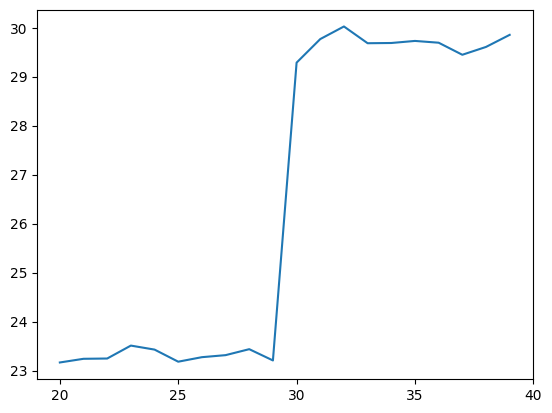

In [122]:
age_vs_timeTaken_df = pd.DataFrame(age_df.groupby('Delivery_person_Age')['Time_taken(min)'].mean()).reset_index()
fig ,axes = plt.subplots() 
axes.plot(age_vs_timeTaken_df['Delivery_person_Age'] , age_vs_timeTaken_df['Time_taken(min)'])
axes.set_xticks(range(20 , 41 ,5));

<Axes: xlabel='Time_taken(min)', ylabel='Delivery_person_Ratings'>

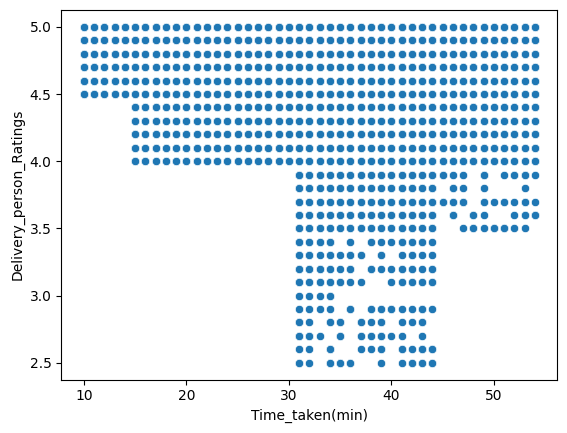

In [123]:
age_df 
correlatoin = age_df['Delivery_person_Ratings'].corr(age_df['Time_taken(min)'])
sns.scatterplot(data= age_df , x='Time_taken(min)' , y='Delivery_person_Ratings')

### heatmap between rating , time_taken and age

C:\Users\Alchemist\AppData\Local\Temp\ipykernel_4048\1944306426.py:9: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = age_df_cp.pivot_table(values='Delivery_person_Ratings', index='Age_Group', columns='Time_Group')


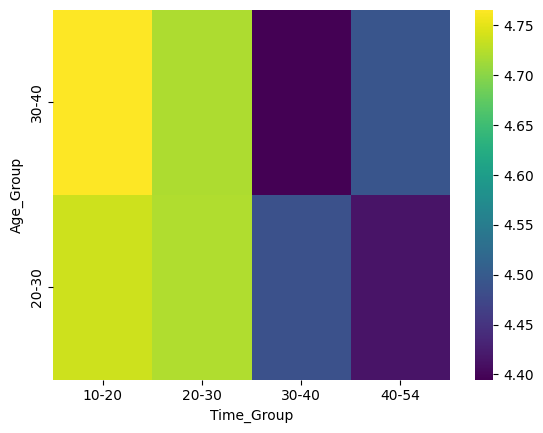

<Figure size 1500x500 with 0 Axes>

In [124]:
age_bins = [20, 30, 40, 50, 60]
time_bins = [10, 20,30, 40,  54]

age_labels = ['20-30', '30-40', '40-50', '50-60']
time_labels = ['10-20','20-30' , '30-40' ,'40-54']
age_df_cp = age_df.copy()
age_df_cp['Age_Group'] = pd.cut(age_df_cp['Delivery_person_Age'], bins=age_bins, labels=age_labels, right=False)
age_df_cp['Time_Group'] = pd.cut(age_df_cp['Time_taken(min)'], bins=time_bins, labels=time_labels, right=False)
pivot_table = age_df_cp.pivot_table(values='Delivery_person_Ratings', index='Age_Group', columns='Time_Group')
heatmap_rating_time_age = sns.heatmap(pivot_table, cmap='viridis')
plt.figure(figsize=(15 , 5))
heatmap_rating_time_age.invert_yaxis()
age_df_cp.to_csv('.//data/visualizations_df/age_df_group.csv')

## Date effect 

### creating date period

In [152]:
date_df = whole_dataSet[['Festival' , 'Order_Date' , 'Time_taken(min)' ,'time_periods', 'Road_traffic_density']].copy()

date_bins = [
    pd.to_datetime('2022-02-01'),#1
    pd.to_datetime('2022-02-10'),#2
    pd.to_datetime('2022-02-20'),#3
    pd.to_datetime('2022-02-28'),#4
    pd.to_datetime('2022-03-10'),#5
    pd.to_datetime('2022-03-20'),#6
    pd.to_datetime('2022-03-31'),#7
    pd.to_datetime('2022-04-10'),#8
    pd.to_datetime('2022-04-20'),#9
    pd.to_datetime('2022-04-30'),#10
]

labels = [
    '2022-02-01 - 2022-02-10', #1
    '2022-02-10 - 2022-02-20', #2
    '2022-02-20 - 2022-02-28', #3
    '2022-03-01 - 2022-03-10', #4
    '2022-03-10 - 2022-03-20', #5
    '2022-03-20 - 2022-03-31', #6
    '2022-04-01 - 2022-04-10', #7
    '2022-04-10 - 2022-04-20', #8
    '2022-04-20 - 2022-04-30', #9
    '2022-04-30 - 2022-05-01' #10
]

def create_periods(x):
    for i in range(len(date_bins) -1) : 
        if date_bins[i]<= x <= date_bins[i+1]:
            return labels[i]    

date_df.loc[: , 'Order_Date_period'] = date_df['Order_Date'].apply(create_periods)
date_df.to_csv('.//data/visualizations_df/date_df.csv')
date_df

# points for larger date range we can create date range and pd.cut
# start_date = pd.to_datetime('2022-02-01')
# end_date = pd.to_datetime('2022-02-28')

# date_bins = pd.date_range(start=start_date , end=end_date, freq='10D') 
# date_bins
 # labels =[f"{date_bins[i].stfrtime('%y-%m-%d')}- {date_bins[i+1].strftime('%y-%m-%d')}" for i in range(len(date_bins)-1)]


,Festival,Order_Date,Time_taken(min),time_periods,Road_traffic_density,Order_Date_period
0,No,2022-03-19,24,10:00-13:00,High,2022-03-10 - 2022-03-20
1,No,2022-03-25,33,19:00-22:00,Jam,2022-03-20 - 2022-03-31
2,No,2022-03-19,26,07:00-10:00,Low,2022-03-10 - 2022-03-20
3,No,2022-04-05,21,16:00-19:00,Medium,2022-04-01 - 2022-04-10
4,No,2022-03-26,30,13:00-16:00,High,2022-03-20 - 2022-03-31
...,...,...,...,...,...,...
45588,No,2022-03-24,32,10:00-13:00,High,2022-03-20 - 2022-03-31
45589,No,2022-02-16,36,19:00-22:00,Jam,2022-02-10 - 2022-02-20
45590,No,2022-03-11,16,22:00-00:00,Low,2022-03-10 - 2022-03-20
45591,No,2022-03-07,26,13:00-16:00,High,2022-03-01 - 2022-03-10


In [153]:
group_date = date_df.groupby('Order_Date_period').size().reset_index(name='total_order')
group_date

,Order_Date_period,total_order
0,2022-02-10 - 2022-02-20,6585
1,2022-03-01 - 2022-03-10,9748
2,2022-03-10 - 2022-03-20,9647
3,2022-03-20 - 2022-03-31,9621
4,2022-04-01 - 2022-04-10,5767


Text(0, 0.5, 'total orders')

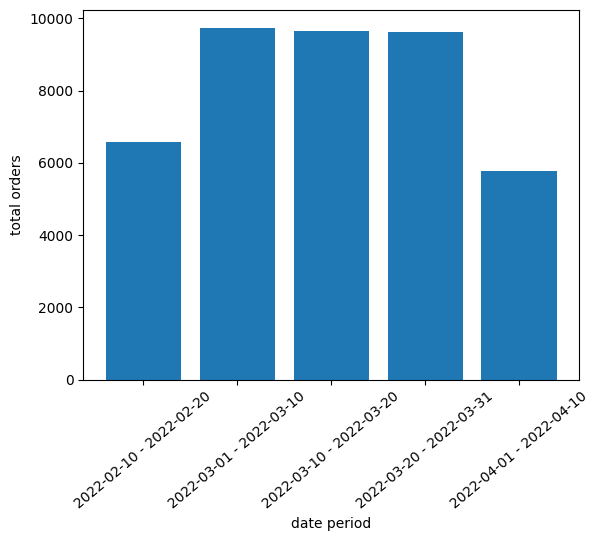

In [154]:
fig , axes = plt.subplots()
axes.bar(group_date['Order_Date_period'] , group_date['total_order'])
plt.xticks(rotation=40)
axes.set_xlabel('date period')
axes.set_ylabel('total orders')

In [155]:
festival_group = date_df.groupby('Order_Date_period')['Festival'].value_counts().reset_index()

Text(0, 0.5, 'Count')

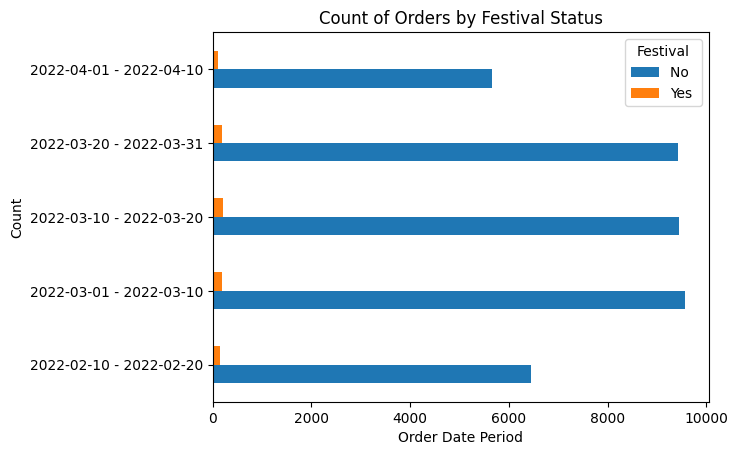

In [151]:
pivot_df = festival_group.pivot_table(index='Order_Date_period', columns='Festival', values='count')
pivot_df.plot(kind='barh')
plt.title('Count of Orders by Festival Status')
plt.xlabel('Order Date Period')
plt.ylabel('Count')

In [156]:
date_df

,Festival,Order_Date,Time_taken(min),time_periods,Road_traffic_density,Order_Date_period
0,No,2022-03-19,24,10:00-13:00,High,2022-03-10 - 2022-03-20
1,No,2022-03-25,33,19:00-22:00,Jam,2022-03-20 - 2022-03-31
2,No,2022-03-19,26,07:00-10:00,Low,2022-03-10 - 2022-03-20
3,No,2022-04-05,21,16:00-19:00,Medium,2022-04-01 - 2022-04-10
4,No,2022-03-26,30,13:00-16:00,High,2022-03-20 - 2022-03-31
...,...,...,...,...,...,...
45588,No,2022-03-24,32,10:00-13:00,High,2022-03-20 - 2022-03-31
45589,No,2022-02-16,36,19:00-22:00,Jam,2022-02-10 - 2022-02-20
45590,No,2022-03-11,16,22:00-00:00,Low,2022-03-10 - 2022-03-20
45591,No,2022-03-07,26,13:00-16:00,High,2022-03-01 - 2022-03-10


In [159]:
count_df = date_df.groupby(['Order_Date_period', 'Road_traffic_density']).size().reset_index(name='count')
count_df

,Order_Date_period,Road_traffic_density,count
0,2022-02-10 - 2022-02-20,High,644
1,2022-02-10 - 2022-02-20,Jam,2133
2,2022-02-10 - 2022-02-20,Low,2182
3,2022-02-10 - 2022-02-20,Medium,1626
4,2022-03-01 - 2022-03-10,High,942
5,2022-03-01 - 2022-03-10,Jam,3054
6,2022-03-01 - 2022-03-10,Low,3361
7,2022-03-01 - 2022-03-10,Medium,2391
8,2022-03-10 - 2022-03-20,High,914
9,2022-03-10 - 2022-03-20,Jam,3114


<Axes: ylabel='Order_Date_period'>

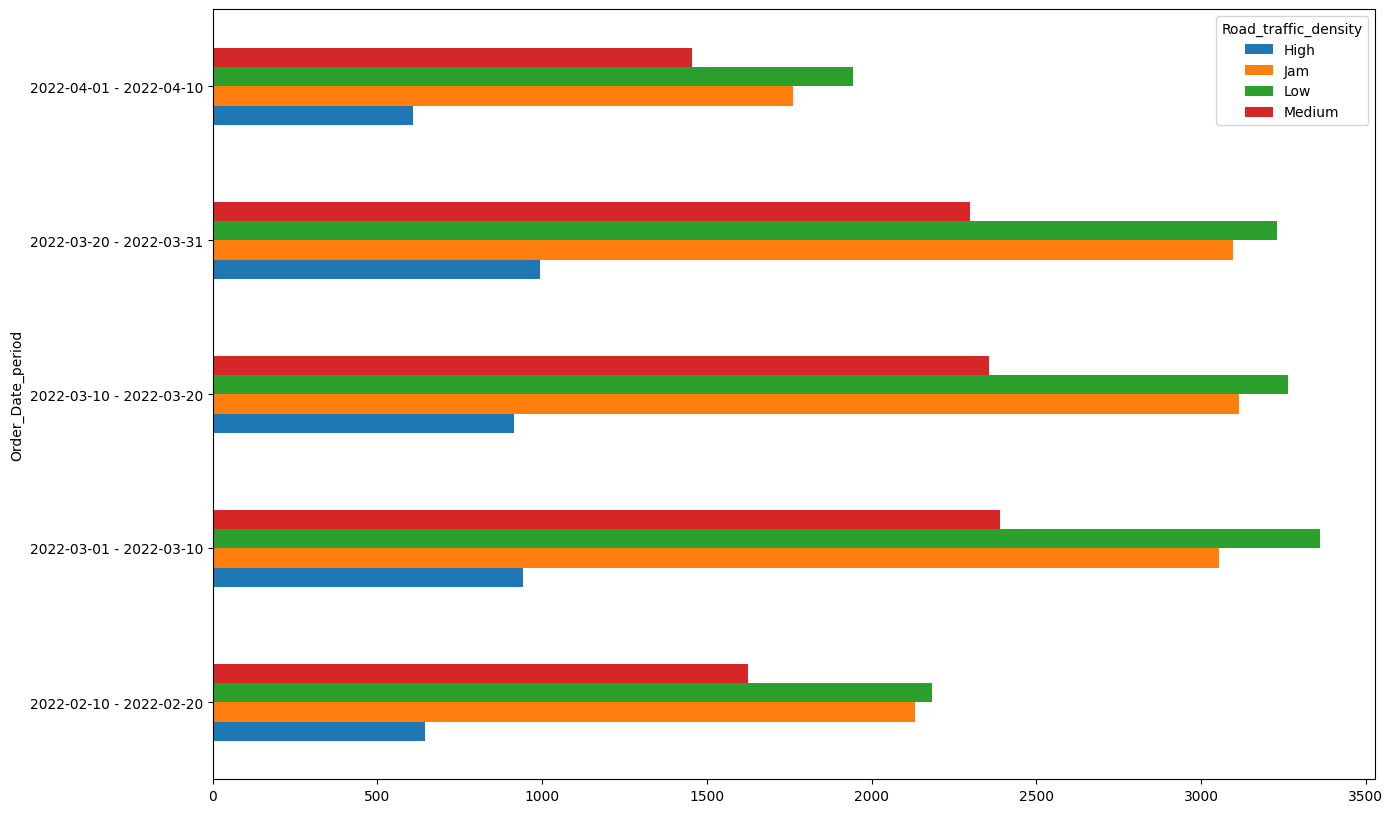

In [170]:
pivot_date_df = pd.pivot_table(count_df , index='Order_Date_period' , columns='Road_traffic_density' , values='count')
pivot_date_df.plot(kind='barh' , figsize=(15 ,10))